# Proyecto Power BI Juegos de mesa

## ÍNDICE
1. EDA
- 1.1. Exploración de los csvs
    - 1.1.1. CSV D1
        - 1.1.2. Exploración general
        - 1.1.3. Tratamiento de datos
    - 1.2.1 CSV D4
        - 1.2.2. Exploración general
        - 1.2.3. Tratamiento de datos
- 1.2. Revisión de los datos de ambos CSV
    - 1.2.1. Unión de los dos CSV
        - 1.2.2. Exploración general del nuevo df
        - 1.2.3. Tratamiento de datos
2. Tratamiento de nulos
- 2.1. Variables Numéricas
    - 2.1.1.  ID
    - 2.1.2.  Year_Published
    - 2.1.3.  Owned_Users

- 2.2. Variables Categóricas
   - 2.2.1.  Mechanics
   - 2.2.2.  Domains
3.  Tratamiento de duplicados
4.  Guardar el df ya tratado como csv

In [99]:
# Importamos lo que vamos a utilizar:
import pandas as pd
pd.set_option('display.max_columns', None) #Para ver todas las columnas

import numpy as np

# Imputar nulos con métodos avanzados estadísticos:
from sklearn.impute import KNNImputer

# Visualización:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. EDA

## 1.1. Exploración de los csvs

### 1.1.1. Csv D1

1.1.2. Exploración general

In [100]:
# Primer csv. Se usa 'encoding="latin-1"' por el tipo de csv:
d1 = pd.read_csv("D1.csv", encoding="latin-1")

In [101]:
d1.head()  #Mas primeras 5 filas del DataFrame (por defecto, pero puedes especificar un número).

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [102]:
d1.columns  #Los nombres de las columnas

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

In [103]:
d1.shape #Una tupla con el número de filas y columnas del DataFrame (filas, columnas).

(20343, 14)

In [104]:
d1.info()  #Info del DataFrame: número de filas, columnas y tipos de datos.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [105]:
d1.dtypes #Tipo de datos de cada columna.

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

In [106]:
d1.duplicated().sum() #Duplicados.

0

In [107]:
d1.isnull().sum() #Nulos.

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [108]:
#Bucle con el que extraemos datos relevantes de cada columna:
columnas = d1.columns

for col in columnas:
    print(f"\n🔹'{col}'\n")
    print(f"Tipo de dato: {d1[col].dtypes}\n")
    print(f"Porcentaje de nulos: {d1[col].isnull().sum()/d1.shape[0]*100}\n")
    print(f"Suma de duplicados: {d1[col].duplicated().sum()}\n")
    print("-" * 50)


🔹'ID'

Tipo de dato: float64

Porcentaje de nulos: 0.07865113306788576

Suma de duplicados: 15

--------------------------------------------------

🔹'Name'

Tipo de dato: object

Porcentaje de nulos: 0.0

Suma de duplicados: 369

--------------------------------------------------

🔹'Year Published'

Tipo de dato: float64

Porcentaje de nulos: 0.00491569581674286

Suma de duplicados: 20154

--------------------------------------------------

🔹'Min Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20332

--------------------------------------------------

🔹'Max Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20289

--------------------------------------------------

🔹'Play Time'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20227

--------------------------------------------------

🔹'Min Age'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20322

--------------------------------------------

1.1.3. Tratamiento de datos

In [109]:
# Modificar los nombres de columna: Separar por '_' en lugar de espacios para poder tratar nulos/etc:

# Muestra los nombres de las columnas.
d1.columns 

# Creación diccionario vacío:
col_f = {} 

# Itera en df.columns y crea un diccionario 'clave : valor' con el reemplazo.
for columna in d1.columns:
    col_f[columna] = columna.replace(" ", "_")

# Se aplica el cambio:
d1.rename(columns = col_f, inplace = True)

# Revisión de que se ha ejecutado correctamente:
print(d1.columns)

Index(['ID', 'Name', 'Year_Published', 'Min_Players', 'Max_Players',
       'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average', 'BGG_Rank',
       'Complexity_Average', 'Owned_Users', 'Mechanics', 'Domains'],
      dtype='object')


## 1.2.1 Csv D4

### 1.2.2. Exploración general

In [110]:
# Segundo csv. Se usa 'encoding="utf-8-sig"' por el tipo de csv:
d4 = pd.read_csv("D4.csv", sep=";", encoding="utf-8-sig")

In [111]:
d4.head()  #Mas primeras 5 filas del DataFrame (por defecto, pero puedes especificar un número).

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [112]:
d4.columns  #Los nombres de las columnas

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

In [113]:
d4.shape #Una tupla con el número de filas y columnas del DataFrame (filas, columnas).

(20343, 14)

In [114]:
d4.info()  #Info del DataFrame: número de filas, columnas y tipos de datos.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


In [115]:
d4.dtypes #Tipo de datos de cada columna.

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
BGG Rank                int64
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

In [116]:
d4.duplicated().sum() #Duplicados.

0

In [117]:
d4.isnull().sum() #Nulos.

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [118]:
#Bucle con el que extraemos datos relevantes de cada columna:
columnas = d4.columns

for col in columnas:
    print(f"\n🔹'{col}'\n")
    print(f"Tipo de dato: {d4[col].dtypes}\n")
    print(f"Porcentaje de nulos: {d4[col].isnull().sum()/d4.shape[0]*100}\n")
    print(f"Suma de duplicados: {d4[col].duplicated().sum()}\n")
    print("-" * 50)


🔹'ID'

Tipo de dato: float64

Porcentaje de nulos: 0.07865113306788576

Suma de duplicados: 15

--------------------------------------------------

🔹'Name'

Tipo de dato: object

Porcentaje de nulos: 0.0

Suma de duplicados: 367

--------------------------------------------------

🔹'Year Published'

Tipo de dato: float64

Porcentaje de nulos: 0.00491569581674286

Suma de duplicados: 20154

--------------------------------------------------

🔹'Min Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20332

--------------------------------------------------

🔹'Max Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20289

--------------------------------------------------

🔹'Play Time'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20227

--------------------------------------------------

🔹'Min Age'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20322

--------------------------------------------

1.2.3. Tratamiento de datos

In [119]:
# Modificar los nombres de columna: Separar por '_' en lugar de espacios para poder tratar nulos/etc:

# Muestra los nombres de las columnas.
d4.columns

# Creación diccionario vacío:
col_f = {} 

# Itera en df.columns y crea un diccionario 'clave : valor' con el reemplazo.
for columna in d4.columns:
    col_f[columna] = columna.replace(" ", "_")

# Se aplica el cambio:
d4.rename(columns = col_f, inplace = True)

# Revisión de que se ha ejecutado correctamente:
print(d4.columns)

Index(['ID', 'Name', 'Year_Published', 'Min_Players', 'Max_Players',
       'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average', 'BGG_Rank',
       'Complexity_Average', 'Owned_Users', 'Mechanics', 'Domains'],
      dtype='object')


## 1.2. Revisión de los datos de ambos CSV

In [120]:
# Comprobación de si las columnas de ambos csv son las mismas:
print(d1.columns)
d4.columns

Index(['ID', 'Name', 'Year_Published', 'Min_Players', 'Max_Players',
       'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average', 'BGG_Rank',
       'Complexity_Average', 'Owned_Users', 'Mechanics', 'Domains'],
      dtype='object')


Index(['ID', 'Name', 'Year_Published', 'Min_Players', 'Max_Players',
       'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average', 'BGG_Rank',
       'Complexity_Average', 'Owned_Users', 'Mechanics', 'Domains'],
      dtype='object')

In [121]:
# Comprobación de la cantidad de datos de ambos csv:
print(d1.shape)
d4.shape

(20343, 14)


(20343, 14)

- No queda claro si d1 y d4 son el mismo csv aunque parece que sí.
- Para comprobarlo se hará un "merge" a partir de la columna 'Name' descartando los repetidos.

### 1.2.1. Unión de los dos CSV

In [122]:
# Normalizar los nombres en cada df:
d1["Name"] = d1["Name"].str.strip().str.lower()
d4["Name"] = d4["Name"].str.strip().str.lower()

# Creación de una variable con todas las filas de d4 que no están en d1:
d4_exclusivos = d4[~d4["Name"].isin(d1["Name"])]

# Concatenación del primer df y la variable creada anteriormente:
dfp = pd.concat([d1, d4_exclusivos], ignore_index=True)

In [123]:
# Revisión para confirmar o no que se han añadido datos:
print(d1.shape)
dfp.shape

(20343, 14)


(20441, 14)

- Vemos que se han añadido algunos datos.

1.2.2. Exploración general del nuevo df

In [124]:
dfp.duplicated().sum()

0

In [125]:
dfp.columns

Index(['ID', 'Name', 'Year_Published', 'Min_Players', 'Max_Players',
       'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average', 'BGG_Rank',
       'Complexity_Average', 'Owned_Users', 'Mechanics', 'Domains'],
      dtype='object')

In [126]:
columnas = dfp.columns

for col in columnas:
    print(f"\n🔹'{col}'\n")
    print(f"Tipo de dato: {dfp[col].dtypes}\n")
    print(f"Porcentaje de nulos: {dfp[col].isnull().sum()/dfp.shape[0]*100}\n")
    print(f"Suma de duplicados: {dfp[col].duplicated().sum()}\n")
    print("-" * 50)


🔹'ID'

Tipo de dato: float64

Porcentaje de nulos: 0.07827405704221907

Suma de duplicados: 113

--------------------------------------------------

🔹'Name'

Tipo de dato: object

Porcentaje de nulos: 0.0

Suma de duplicados: 382

--------------------------------------------------

🔹'Year_Published'

Tipo de dato: float64

Porcentaje de nulos: 0.004892128565138692

Suma de duplicados: 20252

--------------------------------------------------

🔹'Min_Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20430

--------------------------------------------------

🔹'Max_Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20387

--------------------------------------------------

🔹'Play_Time'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20325

--------------------------------------------------

🔹'Min_Age'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20420

------------------------------------------

In [127]:
dfp.sample(5)

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
20304,1797.0,pay day,1975.0,2,6,30,8,2553,4.82,20306,1.25,4959.0,"Auction/Bidding, Card Drafting, Dice Rolling, ...",Family Games
15834,175497.0,dinosaur escape,2015.0,2,4,20,4,99,5.69,15836,1.0,296.0,"Cooperative Game, Memory, Roll / Spin and Move",NaN
517,37904.0,formula d,2008.0,2,10,60,8,17148,7.02,518,1.97,23299.0,"Dice Rolling, Different Dice Movement, Grid Mo...","Family Games, Thematic Games"
1876,159692.0,comanchería: the rise and fall of the comanche...,2016.0,1,1,360,14,562,8.05,1877,4.08,1992.0,"Card Drafting, Chit-Pull System, Dice Rolling,...",Wargames
10820,47125.0,el erudito,2008.0,2,4,60,15,73,6.72,10822,1.8,123.0,NaN,NaN


1.2.3. Tratamiento de datos

In [128]:
# Eliminación de duplicados en la columna 'Name', conservando la primera aparición:
dfp = dfp.drop_duplicates(subset='Name', keep='first')

In [129]:
#Conversión de comas a puntos en varias columnas:
dfp['Rating_Average'] = dfp['Rating_Average'].astype(str).str.replace(',', '.', regex=False).astype(float)
dfp['Complexity_Average'] = dfp['Complexity_Average'].astype(str).str.replace(',', '.', regex=False).astype(float)

# 2. Tratamiento de nulos

In [130]:
#Bucle con el que extraemos datos relevantes de cada columna:
columnas = dfp.columns

for col in columnas:
    print(f"\n🔹'{col}'\n")
    print(f"Tipo de dato: {dfp[col].dtypes}\n")
    print(f"Porcentaje de nulos: {dfp[col].isnull().sum()/dfp.shape[0]*100}\n")
    print(f"Suma de duplicados: {dfp[col].duplicated().sum()}\n")
    print("-" * 50)


🔹'ID'

Tipo de dato: float64

Porcentaje de nulos: 0.07976469415225086

Suma de duplicados: 111

--------------------------------------------------

🔹'Name'

Tipo de dato: object

Porcentaje de nulos: 0.0

Suma de duplicados: 0

--------------------------------------------------

🔹'Year_Published'

Tipo de dato: float64

Porcentaje de nulos: 0.004985293384515679

Suma de duplicados: 19870

--------------------------------------------------

🔹'Min_Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20048

--------------------------------------------------

🔹'Max_Players'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20005

--------------------------------------------------

🔹'Play_Time'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 19943

--------------------------------------------------

🔹'Min_Age'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 20038

--------------------------------------------

Se encuentran nulos en las columnas:
- ID
- Year_Published
- Owned_Users
- Mechanics
- Domains

## 2.1. Numéricas

### 2.1.1.  ID

In [131]:
# Se elimina ya que se reemplazará por 'Name'
dfp.drop('ID', axis=1, inplace=True)

### 2.1.2.  Year_Published

In [132]:
dfp['Year_Published'].value_counts().to_frame().T

Year_Published,2017.0,2018.0,2016.0,2019.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0,2020.0,2009.0,2008.0,2005.0,2007.0,2006.0,2004.0,2003.0,2002.0,2000.0,2001.0,1999.0,1998.0,1997.0,1995.0,1996.0,1992.0,0.0,1994.0,1993.0,1991.0,2021.0,1986.0,1990.0,1981.0,1987.0,1989.0,1983.0,1988.0,1985.0,1982.0,1979.0,1980.0,1975.0,1977.0,1978.0,1984.0,1973.0,1974.0,1972.0,1976.0,1971.0,1970.0,1969.0,1965.0,1968.0,1960.0,1967.0,1964.0,1962.0,1963.0,1930.0,1961.0,1959.0,1966.0,1956.0,1958.0,1935.0,1954.0,1800.0,1850.0,1950.0,1600.0,1955.0,1940.0,1938.0,1400.0,1952.0,1937.0,1953.0,1936.0,1932.0,1925.0,1942.0,1939.0,1890.0,1900.0,1910.0,1933.0,1949.0,1700.0,1530.0,1680.0,1911.0,1941.0,1943.0,1000.0,1927.0,1783.0,1929.0,1888.0,1934.0,1957.0,1796.0,1500.0,-1400.0,1887.0,700.0,1425.0,1909.0,1947.0,1948.0,1860.0,1906.0,1946.0,400.0,1587.0,-3000.0,1810.0,1903.0,1951.0,1920.0,1855.0,-200.0,1874.0,1801.0,1150.0,500.0,1840.0,1741.0,1803.0,1848.0,1687.0,762.0,1755.0,1908.0,1884.0,1750.0,1893.0,1819.0,1866.0,1876.0,1630.0,-100.0,1125.0,1931.0,1916.0,1475.0,1851.0,-2200.0,1861.0,1550.0,1830.0,1441.0,650.0,1663.0,2022.0,1881.0,1780.0,-2600.0,1892.0,1921.0,-3500.0,1919.0,1802.0,1870.0,1715.0,550.0,1885.0,1889.0,1904.0,1534.0,1824.0,1701.0,1913.0,1883.0,1742.0,600.0,1915.0,1300.0,1864.0,1945.0,1745.0,1775.0,1895.0,1899.0,1825.0,-1300.0
count,1273,1254,1247,1138,1137,981,847,811,731,684,680,628,573,538,518,514,482,397,324,290,283,261,240,212,209,207,196,183,177,176,163,146,143,141,141,132,131,124,124,123,121,119,119,102,95,91,87,70,67,65,62,33,31,25,25,24,19,18,18,17,15,11,11,11,9,9,8,7,6,5,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [133]:
# Conversión de negativos a positivos con una función:

def negativos(columna):
    if columna < 0:
        return columna * (-1)
    elif columna == 0:
        return columna
    elif columna >=0:
        return columna

# Aplicación de la función y reemplazo de la columna:
dfp['Year_Published'] = dfp['Year_Published'].apply(negativos)

In [134]:
# Conversión de los años "absurdos" en nulos para después tratarlos:
def resto(columna):
    if columna <= 1000:
        return np.nan
    elif columna == 3500:
        return np.nan
    elif columna == 2600:
        return np.nan
    elif columna == 2200:
        return np.nan
    elif columna == 3000:
        return np.nan
    else:
        return columna

# Aplicación de la función y reemplazo de la columna:
dfp['Year_Published'] = dfp['Year_Published'].apply(resto)

In [135]:
# Conteo de nulos y elección de cómo tratarlos:
print(f'El porcentaje de nulos en Year_Published redondeado a dos decimales es: {(dfp["Year_Published"].isnull().sum()/dfp.shape[0]*100)}%.')
if (dfp["Year_Published"].isnull().sum()/dfp.shape[0]*100) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')

El porcentaje de nulos en Year_Published redondeado a dos decimales es: 1.0070292636721672%.
Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.


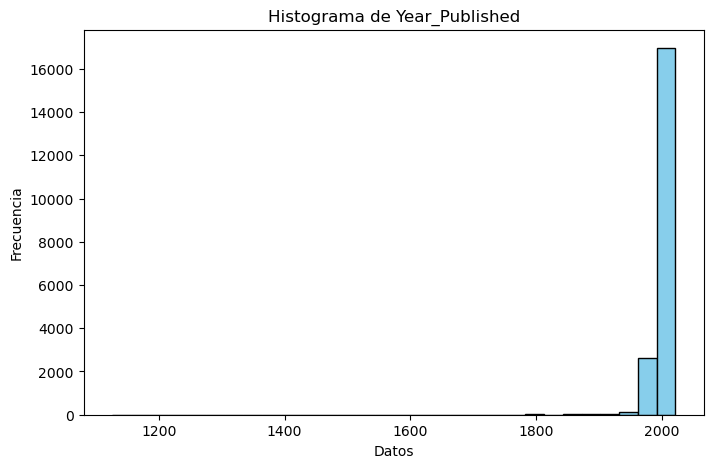

In [136]:
# Creación de la variable h1 para poder generar el histograma:
h1 = dfp['Year_Published']

# Uso de plt para crearlo:
plt.figure(figsize=(8, 5)) #Definición del tamaño de la figura.

# Con "dropna" se eliminan los nulos para poder graficar, con "bin" los intervalos y además los colores.
plt.hist(h1.dropna(), bins=30, color='skyblue', edgecolor='black')

# Ttulo del histograma y sus etiquetas:
plt.title(f'Histograma de Year_Published')
plt.xlabel('Datos')
plt.ylabel('Frecuencia')

# Muestra el gráfico:
plt.show()

Al no ser una distribución simétrica se imputan los datos con la mediana.

In [137]:
# Creación de una variable que calcula la mediana para después poder aplicar fillna:
medianah1= dfp['Year_Published'].median()

# Rellena los nulos con la mediana y modifica la columna:
dfp['Year_Published'] = dfp['Year_Published'].fillna(medianah1)

# Revisión de que se ha realizado correctamente:
print(f'El porcentaje de nulos en Year_Published ahora es: {dfp['Year_Published'].isnull().sum()/dfp.shape[0]*100}.')
print(f'Sus valores únicos son: {dfp["Year_Published"].unique()}')

El porcentaje de nulos en Year_Published ahora es: 0.0.
Sus valores únicos son: [2017. 2015. 2018. 2016. 2020. 2005. 2012. 2011. 2013. 2007. 2019. 2014.
 2002. 2004. 2008. 2006. 2010. 1876. 1995. 2009. 1997. 1982. 1999. 1993.
 1991. 2000. 2003. 1986. 1998. 1992. 1996. 1964. 1980. 1985. 1994. 1475.
 2001. 1990. 1983. 1989. 1959. 1630. 1977. 1800. 1925. 1984. 1850. 1988.
 1810. 1987. 1971. 1978. 1979. 1587. 1981. 1973. 1974. 1962. 2021. 1848.
 1903. 1938. 1947. 1948. 1960. 1895. 1930. 1972. 1976. 1906. 1967. 1745.
 1864. 1970. 1946. 1883. 1965. 1975. 1966. 1425. 1701. 1969. 1939. 1600.
 1942. 1909. 1904. 1932. 1963. 1968. 1780. 1921. 1663. 1870. 1956. 1951.
 1715. 1885. 1955. 1860. 1830. 1796. 1887. 1889. 1890. 1680. 1953. 1958.
 1954. 1802. 1937. 1700. 1892. 1911. 1881. 2022. 1943. 1534. 1950. 1824.
 1910. 1913. 1961. 1742. 1915. 1300. 1940. 1900. 1941. 1945. 1952. 1783.
 1775. 1949. 1899. 1825. 1919. 1441. 1400. 1936. 1929. 1801. 1840. 1741.
 1803. 1933. 1935. 1755. 1908. 1884. 1934. 1

In [138]:
# Por último cambio de dato a int, ya que no tiene sentido que un año sea float:
dfp['Year_Published'] = dfp['Year_Published'].astype(int)
dfp['Year_Published'].dtype

dtype('int64')

### 2.1.3.  Owned_Users

In [139]:
# Conteo de valores:
dfp['Owned_Users'].value_counts()

Owned_Users
80.0       67
73.0       66
122.0      65
105.0      62
109.0      61
           ..
10416.0     1
2514.0      1
4748.0      1
16939.0     1
4400.0      1
Name: count, Length: 3980, dtype: int64

In [140]:
# Conteo de nulos y elección de cómo tratarlos:
print(f'El porcentaje de nulos redondeado a dos decimales es: {(dfp["Owned_Users"].isnull().sum()/dfp.shape[0]*100)}%.')
if (dfp["Owned_Users"].isnull().sum()/dfp.shape[0]*100) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')

El porcentaje de nulos redondeado a dos decimales es: 0.11466174784386061%.
Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.


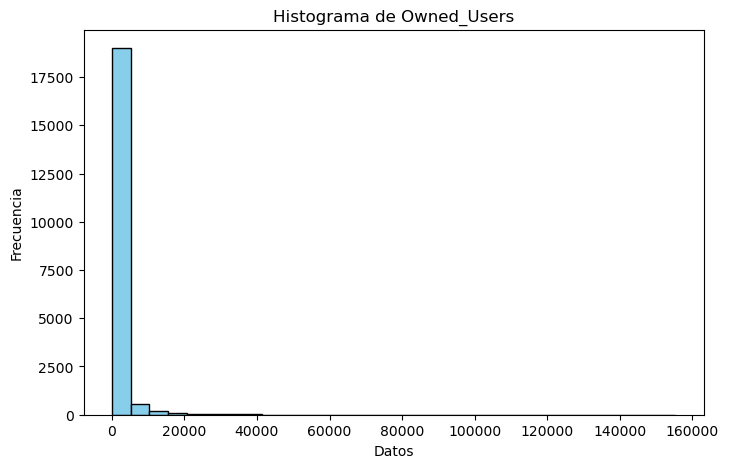

In [141]:
# Creación de la variable h2 para poder generar el histograma:
h2 = dfp['Owned_Users']

# Uso de plt para crearlo:
plt.figure(figsize=(8, 5)) #Definición del tamaño de la figura.

# Con "dropna" se eliminan los nulos para poder graficar, con "bin" los intervalos y además los colores.
plt.hist(h2.dropna(), bins=30, color='skyblue', edgecolor='black')

# Ttulo del histograma y sus etiquetas:
plt.title(f'Histograma de Owned_Users')
plt.xlabel('Datos')
plt.ylabel('Frecuencia')

# Muestra el gráfico:
plt.show()

Al no ser una distribución simétrica se imputan los datos con la mediana.

In [142]:
# Creación de una variable que calcula la mediana para después poder aplicar fillna:
medianah2= dfp['Owned_Users'].median()

# Rellena los nulos con la mediana y modifica la columna:
dfp['Owned_Users'] = dfp['Owned_Users'].fillna(medianah2)

# Revisión de que se ha realizado correctamente:
print(f'El porcentaje de nulos en Owned_Users ahora es: {dfp['Owned_Users'].isnull().sum()/dfp.shape[0]*100}.')
print(f'Sus valores únicos son: {dfp["Owned_Users"].unique()}')

El porcentaje de nulos en Owned_Users ahora es: 0.0.
Sus valores únicos son: [68323. 65294. 28785. ...  4962.  5788.  4400.]


In [143]:
# Por último cambio de dato a int, ya que no tiene sentido que el número de propietarios sea float:
dfp['Owned_Users'] = dfp['Owned_Users'].astype(int)
dfp['Owned_Users'].dtype

dtype('int64')

## 2.2.  Categóricas

### 2.2.1.  Mechanics

In [144]:
dfp['Mechanics'].value_counts().to_frame().T

Mechanics,Hand Management,Hexagon Grid,Dice Rolling,Roll / Spin and Move,Tile Placement,"Dice Rolling, Hexagon Grid, Simulation","Dice Rolling, Hexagon Grid",Set Collection,"Hand Management, Set Collection",Pattern Recognition,Pattern Building,Memory,Cooperative Game,Trick-taking,Card Drafting,"Auction/Bidding, Player Elimination, Roll / Spin and Move, Set Collection, Trading",Grid Movement,Simultaneous Action Selection,"Dice Rolling, Push Your Luck",Auction/Bidding,"Hexagon Grid, Simulation","Card Drafting, Set Collection",Betting and Bluffing,"Hand Management, Simultaneous Action Selection",Voting,"Card Drafting, Hand Management","Dice Rolling, Roll / Spin and Move",Area Movement,Modular Board,Team-Based Game,Storytelling,Point to Point Movement,"Hand Management, Take That",Deck Bag and Pool Building,"Pattern Building, Tile Placement","Hand Management, Variable Player Powers","Dice Rolling, Set Collection",Variable Player Powers,"Dice Rolling, Grid Movement, Hexagon Grid, Simulation",Push Your Luck,"Dice Rolling, Variable Player Powers","Roll / Spin and Move, Set Collection",Area Majority / Influence,"Area Majority / Influence, Hand Management","Hand Management, Set Collection, Take That","Cooperative Game, Storytelling","Area Movement, Dice Rolling","Memory, Set Collection","Auction/Bidding, Set Collection","Hand Management, Tile Placement","Card Drafting, Deck Bag and Pool Building, Hand Management","Area Majority / Influence, Tile Placement","Card Drafting, Hand Management, Set Collection","Chit-Pull System, Hexagon Grid",Paper-and-Pencil,"Dice Rolling, Hand Management","Dice Rolling, Paper-and-Pencil",Worker Placement,Simulation,Take That,Acting,"Memory, Pattern Recognition","Network and Route Building, Stock Holding, Tile Placement","Dice Rolling, Simulation","Hand Management, Trick-taking","Set Collection, Tile Placement","Chit-Pull System, Dice Rolling, Hexagon Grid","Auction/Bidding, Network and Route Building, Stock Holding, Tile Placement",Action Points,"Dice Rolling, Hexagon Grid, Simulation, Zone of Control","Push Your Luck, Set Collection","Modular Board, Tile Placement",Secret Unit Deployment,Pick-up and Deliver,"Chit-Pull System, Dice Rolling, Hexagon Grid, Simulation","Pattern Building, Pattern Recognition","Dice Rolling, Pattern Recognition","Set Collection, Trading","Cooperative Game, Dice Rolling","Hand Management, Pattern Building","Area Movement, Dice Rolling, Simulation",Player Elimination,"Area Majority / Influence, Dice Rolling","Dice Rolling, Modular Board, Variable Player Powers","Cooperative Game, Hand Management","Dice Rolling, Push Your Luck, Set Collection","Set Collection, Worker Placement",Campaign / Battle Card Driven,"Dice Rolling, Pattern Building",Line Drawing,"Dice Rolling, Modular Board","Hand Management, Memory",Role Playing,"Deck Bag and Pool Building, Hand Management","Card Drafting, Dice Rolling","Dice Rolling, Memory","Action Points, Dice Rolling, Variable Player Powers","Action Points, Dice Rolling","Enclosure, Tile Placement","Hand Management, Take That, Variable Player Powers","Dice Rolling, Point to Point Movement",Action Queue,"Betting and Bluffing, Dice Rolling","Cooperative Game, Roll / Spin and Move","Deck Bag and Pool Building, Dice Rolling, Variable Player Powers","Dice Rolling, Modular Board, Roll / Spin and Move","Dice Rolling, Tile Placement","Cooperative Game, Memory","Pattern Recognition, Set Collection","Dice Rolling, Worker Placement","Pick-up and Deliver, Roll / Spin and Move","Hand Management, Push Your Luck","Cooperative Game, Dice Rolling, Variable Player Powers","Memory, Roll / Spin and Move","Action Points, Dice Rolling, Grid Movement, Variable Player Powers","Cooperative Game, Deck Bag and Pool Building","Dice Rolling, Grid Movement, Hexagon Grid, Movement Points, Ratio / Combat Results Table, Scenario / Mission / Campaign Game, Simulation, Zone of Control","Hand Management, Player Elimination","Network and Route Building, Tile Placement","Auction/Bidding, Ha

- Será difícil trabajar con gráficos si los datos van separados por comas.
- Se aplica una función para que aleatoriamente cada 'Mechanic' (mecánica) solamente tenga una entrada en 'Mechanics'.

In [145]:
import random

# Creación de una variable con los valores únicos de 'Mechanics'
mecanicas = [
    "Auction", "Area Movement", "Area Majority", "Acting", "Action Points", "Action Queue","Area-Impulse", 
    "Betting and Bluffing","Card Drafting", "Cooperative Game", "Chit-Pull System", "Communication Limits",
    "Dice Rolling", "Deck Bag and Pool Building", "Enclosure", "Flicking","Grid Movement",
    "Hand Management", "Hexagon Grid", "Line Drawing", "Ladder Climbing", "Memory", "Modular Board",
    "Mancala", "Network and Route Building", "Pattern Building", "Pattern Recognition",
    "Point to Point Movement", "Push Your Luck", "Paper-and-Pencil", "Pick-up and Deliver",
    "Player Elimination", "Roll / Spin and Move", "Rock-Paper-Scissors", "Role playing",
    "Simulation", "Set Collection", "Storytelling", "Simultaneous Action Selection",
    "Stacking and Balancing", "Secret Unit Deployment", "Stock Holding", "Square Grid",
    "Singing", "Take That", "Team-Based Game", "Tile Placement", "Trick-taking", "Tile Placement",
    "Trading", "Variable Player Powers", "Voting", "Worker Placement", "Zone of Control"
]

# Función que filtra todos los valores en 'Mechanics':
def filtrar_mecanica_aleatoria(valor):
    if pd.isna(valor):
        return None
    coincidencias = [m for m in mecanicas if m in valor] #Devuelve un valor aleatorio de los que ya tiene.
    if coincidencias:
        return random.choice(coincidencias) 
    else:
        return "Otros"  #En caso de que no coincidiese ninguno devolvería "Otros".

# Aplicación de la función:
dfp['Mechanics'] = dfp['Mechanics'].apply(filtrar_mecanica_aleatoria)

# Revisión de que se ha ejecutado correctamente:
dfp['Mechanics'].value_counts()

Mechanics
Dice Rolling                     2077
Hand Management                  1620
Set Collection                   1068
Hexagon Grid                     1037
Tile Placement                   1007
Roll / Spin and Move              686
Variable Player Powers            684
Card Drafting                     618
Simulation                        586
Cooperative Game                  568
Area Majority                     470
Modular Board                     468
Grid Movement                     432
Simultaneous Action Selection     413
Auction                           404
Memory                            397
Pattern Building                  363
Area Movement                     363
Point to Point Movement           339
Take That                         316
Team-Based Game                   314
Action Points                     303
Pattern Recognition               295
Worker Placement                  290
Push Your Luck                    286
Deck Bag and Pool Building        258
Tr

In [146]:
# La "/" que separa "Roll / Spin" es problemática por lo que se elimina con una función:

def barrita(Mechanics):
    if Mechanics == "Roll / Spin and Move":
        return "Roll and Move"
    else:
        return Mechanics

# Aplicación de la función y sustitución:
dfp['Mechanics'] = dfp['Mechanics'].apply(barrita)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Selección de columnas útiles
features = ['Year_Published', 'Min_Players', 'Max_Players',
            'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average',
            'Complexity_Average', 'Owned_Users']

df1 = dfp.copy()

# 2. Separar datos con y sin 'Mechanics'
df_known = df1[df1['Mechanics'].notna()].copy()
df_unknown = df1[df1['Mechanics'].isna()].copy()

# 3. Escalar los datos
scaler = StandardScaler()
X_known = scaler.fit_transform(df_known[features])
X_unknown = scaler.transform(df_unknown[features])

# 4. Entrenar KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_known, df_known['Mechanics'])

# 5. Predecir los valores faltantes
predicciones = knn.predict(X_unknown)

# 6. Rellenar en el DataFrame original
df1.loc[df1['Mechanics'].isna(), 'Mechanics'] = predicciones

# 7. Resultado final
print(df1['Mechanics'].value_counts())

Mechanics
Dice Rolling                     2347
Hand Management                  1790
Set Collection                   1151
Hexagon Grid                     1064
Tile Placement                   1063
Roll and Move                     792
Card Drafting                     719
Variable Player Powers            695
Cooperative Game                  630
Simulation                        598
Area Majority                     544
Modular Board                     487
Auction                           471
Grid Movement                     462
Simultaneous Action Selection     433
Memory                            433
Area Movement                     411
Pattern Building                  390
Point to Point Movement           349
Action Points                     340
Pattern Recognition               327
Team-Based Game                   327
Take That                         327
Push Your Luck                    297
Worker Placement                  292
Deck Bag and Pool Building        267
Be

In [148]:
df1['Mechanics'].isnull().sum()

0

### 2.2.2.  Domains

In [149]:
df1['Domains'].unique()

array(['Strategy Games, Thematic Games', 'Strategy Games',
       'Thematic Games', 'Strategy Games, Wargames',
       'Thematic Games, Wargames', 'Family Games, Strategy Games',
       'Customizable Games, Thematic Games',
       'Abstract Games, Family Games', 'Customizable Games',
       'Family Games', 'Party Games', 'Customizable Games, Wargames',
       'Wargames', 'Party Games, Thematic Games', 'Abstract Games',
       'Customizable Games, Strategy Games',
       'Family Games, Thematic Games', 'Family Games, Party Games',
       'Abstract Games, Strategy Games', "Children's Games, Family Games",
       nan, 'Party Games, Strategy Games', "Children's Games",
       "Children's Games, Party Games",
       'Abstract Games, Customizable Games',
       'Family Games, Strategy Games, Thematic Games',
       'Family Games, Party Games, Thematic Games',
       'Abstract Games, Party Games', "Abstract Games, Children's Games",
       'Strategy Games, Thematic Games, Wargames',
       'F

- Será difícil trabajar con gráficos si los datos van separados por comas.
- Se aplica una función para que aleatoriamente cada 'Name' (juego) solamente tenga una entrada en 'Domains'.

In [150]:
import random

# Creación de una variable con los valores únicos de 'Domains'
domains_unicos = ["Abstract Games", "Children's Games", "Customizable Games",
           "Family Games", "Party Games", "Strategy Games", "Thematic Games", "Wargames"
]

# Función que filtra todos los valores en 'Domains':
def filtrar_domains_aleatorios(valor):
    if pd.isna(valor): #En el caso de que no estuviera dentro devuelve "NaN".
        return np.nan
    coincidencias = [m for m in domains_unicos if m in valor] #Si está dentro:
    if coincidencias:
        return random.choice(coincidencias) #Devuelve un valor aleatorio de los que ya tiene.
    else:
        return "Otros"  #En caso de que no coincidiese ninguno devolvería "Otros".

# Aplicación de la función:
df1['Domains'] = df1['Domains'].apply(filtrar_domains_aleatorios)

# Revisión de que se ha ejecutado correctamente:
df1['Domains'].unique()


array(['Strategy Games', 'Thematic Games', 'Wargames', 'Abstract Games',
       'Customizable Games', 'Family Games', 'Party Games', nan,
       "Children's Games"], dtype=object)

In [151]:
#Imputación de nulos KNN:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Selección de columnas útiles
features = ['Year_Published', 'Min_Players', 'Max_Players',
            'Play_Time', 'Min_Age', 'Users_Rated', 'Rating_Average',
            'Complexity_Average', 'Owned_Users']

df2 = df1.copy()

# 2. Separar datos con y sin 'Domains'
df_known = df2[df2['Domains'].notna()].copy()
df_unknown = df2[df2['Domains'].isna()].copy()

# 3. Escalar los datos
scaler = StandardScaler()
X_known = scaler.fit_transform(df_known[features])
X_unknown = scaler.transform(df_unknown[features])

# 4. Entrenar KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_known, df_known['Domains'])

# 5. Predecir los valores faltantes
predicciones = knn.predict(X_unknown)

# 6. Rellenar en el DataFrame original
df2.loc[df1['Domains'].isna(), 'Domains'] = predicciones

# 7. Resultado final
print(df2['Domains'].value_counts())

Domains
Family Games          4868
Wargames              4264
Strategy Games        3047
Abstract Games        2460
Children's Games      2013
Party Games           1534
Thematic Games        1410
Customizable Games     463
Name: count, dtype: int64


In [152]:
df2['Domains'].isnull().sum()

0

In [153]:
#Conversión de puntos a comas de nuevo:
df2['Rating_Average'] = df2['Rating_Average'].astype(str).str.replace(',', '.', regex=False).astype(float)
df2['Complexity_Average'] = df2['Complexity_Average'].astype(str).str.replace(',', '.', regex=False).astype(float)

# 3. Tratamiento de duplicados

In [154]:
# Ya que hay algunos duplicados en 'Name'
df2 = df2.drop_duplicates(subset='Name', keep='first')

# 4. Guardar el df ya tratado como csv

In [155]:
df2.to_csv("Juegos_de_mesa.csv", index=False)